<a href="https://colab.research.google.com/github/jisuseo/forecast_kimsasia/blob/main/forecast_kimsasia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dataset_pur = pd.read_csv("/content/drive/MyDrive/#IT/forecast_kimsasia/data/20.10.2022-03.12.2024_purchase.csv", encoding = 'latin-1',  sep=';', skipinitialspace=True)
dataset_dem = pd.read_csv("/content/drive/MyDrive/#IT/forecast_kimsasia/data/20.10.2022-03.12.2024_demand.csv", encoding = 'latin-1',  sep=';', skipinitialspace=True)

<ipython-input-3-2e0aa5e96b50>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_dem = pd.read_csv("/content/drive/MyDrive/#IT/forecast_kimsasia/data/20.10.2022-03.12.2024_demand.csv", encoding = 'latin-1',  sep=';', skipinitialspace=True)


In [4]:
dataset_pur.head()

,BDaAU,BDaRG,Artikel,Bezeichnung,Partien.Nummer,haltbar,EZMenge,Menge,EK,Preis,...,ErstelltUm,ErstelltVon,HaltbarBis,Lieferant,LfdNr,Name,Lieferanten.Name,Lieferanten.PLZ,Lieferanten.Ort,Lieferanten.Land
0,NaN,21.10.2022,K-010018,Ojingeo Champong Ramyun 20X124g,NaN,NaN,300.0,6.0,"0,79","0,70",...,08:30,JY,NaN,72316,1,"Nongshim Co., Ltd.","Nongshim Co., Ltd.",NaN,"Seoul, Korea",KR
1,NaN,21.10.2022,K-010019,Ansung Tang Myun 20X125G,NaN,NaN,400.0,8.0,"0,56","0,54",...,08:30,JY,NaN,72316,2,"Nongshim Co., Ltd.","Nongshim Co., Ltd.",NaN,"Seoul, Korea",KR
2,NaN,21.10.2022,K-01020,Veggie Soon Cup 12x67g,NaN,NaN,100.0,1.2,"0,71","0,66",...,08:30,JY,NaN,72316,3,"Nongshim Co., Ltd.","Nongshim Co., Ltd.",NaN,"Seoul, Korea",KR
3,NaN,21.10.2022,K-01006,Veggie Ramyun Soon Export 20x112g,NaN,NaN,400.0,8.0,"0,64","0,61",...,08:30,JY,NaN,72316,4,"Nongshim Co., Ltd.","Nongshim Co., Ltd.",NaN,"Seoul, Korea",KR
4,NaN,21.10.2022,K-0114,Potato Noodle Soup 20x100g,NaN,NaN,300.0,6.0,"0,64","0,61",...,08:30,JY,NaN,72316,5,"Nongshim Co., Ltd.","Nongshim Co., Ltd.",NaN,"Seoul, Korea",KR


In [5]:
dataset_pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12800 entries, 0 to 12799
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BDaAU             4277 non-null   object 
 1   BDaRG             2811 non-null   object 
 2   Artikel           12800 non-null  object 
 3   Bezeichnung       12799 non-null  object 
 4   Partien.Nummer    12593 non-null  float64
 5   haltbar           12455 non-null  object 
 6   EZMenge           12794 non-null  float64
 7   Menge             12796 non-null  float64
 8   EK                12138 non-null  object 
 9   Preis             12658 non-null  object 
 10  Gesamt            12754 non-null  object 
 11  St                12792 non-null  float64
 12  ErstelltAm        12800 non-null  object 
 13  ErstelltUm        12800 non-null  object 
 14  ErstelltVon       12800 non-null  object 
 15  HaltbarBis        10839 non-null  object 
 16  Lieferant         12800 non-null  int64 

In [6]:
dataset_pur.head()

,BDaAU,BDaRG,Artikel,Bezeichnung,Partien.Nummer,haltbar,EZMenge,Menge,EK,Preis,...,ErstelltUm,ErstelltVon,HaltbarBis,Lieferant,LfdNr,Name,Lieferanten.Name,Lieferanten.PLZ,Lieferanten.Ort,Lieferanten.Land
0,NaN,21.10.2022,K-010018,Ojingeo Champong Ramyun 20X124g,NaN,NaN,300.0,6.0,"0,79","0,70",...,08:30,JY,NaN,72316,1,"Nongshim Co., Ltd.","Nongshim Co., Ltd.",NaN,"Seoul, Korea",KR
1,NaN,21.10.2022,K-010019,Ansung Tang Myun 20X125G,NaN,NaN,400.0,8.0,"0,56","0,54",...,08:30,JY,NaN,72316,2,"Nongshim Co., Ltd.","Nongshim Co., Ltd.",NaN,"Seoul, Korea",KR
2,NaN,21.10.2022,K-01020,Veggie Soon Cup 12x67g,NaN,NaN,100.0,1.2,"0,71","0,66",...,08:30,JY,NaN,72316,3,"Nongshim Co., Ltd.","Nongshim Co., Ltd.",NaN,"Seoul, Korea",KR
3,NaN,21.10.2022,K-01006,Veggie Ramyun Soon Export 20x112g,NaN,NaN,400.0,8.0,"0,64","0,61",...,08:30,JY,NaN,72316,4,"Nongshim Co., Ltd.","Nongshim Co., Ltd.",NaN,"Seoul, Korea",KR
4,NaN,21.10.2022,K-0114,Potato Noodle Soup 20x100g,NaN,NaN,300.0,6.0,"0,64","0,61",...,08:30,JY,NaN,72316,5,"Nongshim Co., Ltd.","Nongshim Co., Ltd.",NaN,"Seoul, Korea",KR


In [7]:
# 결측값 처리
# 데이터 타입 변환
# 불필요한 열 제거
# 중복 데이터 확인 및 제거
# 데이터 표준화

In [27]:
#결측값 확인
total_rows = len(dataset_pur)
missing_values_summary['MissingPercentage'] = (
    missing_values_summary['MissingCount'] / len(dataset_pur) * 100
)


In [28]:
print("총 열의 개수 :", total_rows)
missing_values_summary

총 열의 개수 : 12800


,Column,MissingCount,MissingPercentage
0,BDaAU,8523,66.585938
1,BDaRG,9989,78.039062
2,Artikel,0,0.000000
3,Bezeichnung,1,0.007812
4,Partien.Nummer,207,1.617187
5,haltbar,345,2.695312
6,EZMenge,6,0.046875
7,Menge,4,0.031250
8,EK,662,5.171875
9,Preis,142,1.109375


In [29]:
# 날짜 열을 datetime 형식으로 변환 (BDaAU와 BDaRG)
dataset_pur['BDaAU'] = pd.to_datetime(dataset_pur['BDaAU'], format='%d.%m.%Y', errors='coerce')
dataset_pur['BDaRG'] = pd.to_datetime(dataset_pur['BDaRG'], format='%d.%m.%Y', errors='coerce')

print(dataset_pur[['BDaAU', 'BDaRG']].head())



  BDaAU      BDaRG
0   NaT 2022-10-21
1   NaT 2022-10-21
2   NaT 2022-10-21
3   NaT 2022-10-21
4   NaT 2022-10-21


In [34]:
# 상단과 하단에서 존재하는 값을 추출
upper_bda_au = dataset_pur['BDaAU'].iloc[:len(dataset_pur)//2].dropna()
lower_bda_au = dataset_pur['BDaAU'].iloc[len(dataset_pur)//2:].dropna()

upper_bda_rg = dataset_pur['BDaRG'].iloc[:len(dataset_pur)//2].dropna()
lower_bda_rg = dataset_pur['BDaRG'].iloc[len(dataset_pur)//2:].dropna()

# 상단과 하단 대표값 계산
upper_date_au = upper_bda_au.mean() if not upper_bda_au.empty else None
lower_date_au = lower_bda_au.mean() if not lower_bda_au.empty else None

upper_date_rg = upper_bda_rg.mean() if not upper_bda_rg.empty else None
lower_date_rg = lower_bda_rg.mean() if not lower_bda_rg.empty else None

# 결측값을 채우는 함수 정의
def fill_bda_with_existing_values(row, column, upper_date, lower_date):
    if pd.isnull(row[column]):  # 결측값인 경우
        if row.name < len(dataset_pur) // 2:  # 상단 행
            return upper_date
        else:  # 하단 행
            return lower_date
    return row[column]  # 원래 값 유지

# 각 열의 결측값 채우기
dataset_pur['BDaAU'] = dataset_pur.apply(lambda row: fill_bda_with_existing_values(row, 'BDaAU', upper_date_au, lower_date_au), axis=1)
dataset_pur['BDaRG'] = dataset_pur.apply(lambda row: fill_bda_with_existing_values(row, 'BDaRG', upper_date_rg, lower_date_rg), axis=1)

# 결과 확인
dataset_pur[['BDaAU', 'BDaRG']].isnull().sum()



,0
BDaAU,0
BDaRG,0


In [37]:
# 날짜만 추출한 데이터프레임 출력
print(dataset_pur[['BDaAU', 'BDaRG']].head().applymap(lambda x: x.strftime('%Y-%m-%d')))
print(dataset_pur[['BDaAU', 'BDaRG']].sample(10).applymap(lambda x: x.strftime('%Y-%m-%d')))


        BDaAU       BDaRG
0  2022-10-24  2022-10-21
1  2022-10-24  2022-10-21
2  2022-10-24  2022-10-21
3  2022-10-24  2022-10-21
4  2022-10-24  2022-10-21
            BDaAU       BDaRG
9427   2024-04-04  2024-03-28
11240  2024-07-24  2024-03-28
7267   2023-09-06  2024-03-28
11143  2024-06-20  2024-03-28
12060  2024-10-04  2024-03-28
8475   2024-01-10  2024-03-28
5596   2022-10-24  2023-05-24
3430   2022-10-24  2023-01-18
5746   2022-10-24  2023-01-18
7928   2023-11-13  2024-03-28


<ipython-input-37-5f67181459fd>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dataset_pur[['BDaAU', 'BDaRG']].head().applymap(lambda x: x.strftime('%Y-%m-%d')))
<ipython-input-37-5f67181459fd>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dataset_pur[['BDaAU', 'BDaRG']].sample(10).applymap(lambda x: x.strftime('%Y-%m-%d')))


데이터 탐색
목표 데이터의 주요 특징 파악

데이터의 분포, 패턴, 이상값 파악

통계값 확인
특정 열의 값 분포 시각화
날짜를 기준으로 한 트렌드 분석


1. 기본 통계 확인
- 전반적인 요약 통계량 (ean, std, min, max)
- 숫자형 데이터와 날짜 데이터 중심으로 탐색

2. 결측값 재확인
- 결측값이 얼마나 남았는지 재확인

3. 열별 데이터 분포 파악
- 주요 숫자형 열 Menge, Preis, Gesamt 분포 시각화
- 날짜 열 (BDaAU, BDaRG) 범위를 확인

4. 데이터 간 관계 분석
- 구매 수량(Menge)과 총 금액(Gesamt)의 상관관계분석
- 특정 공급자별 구매량 분석

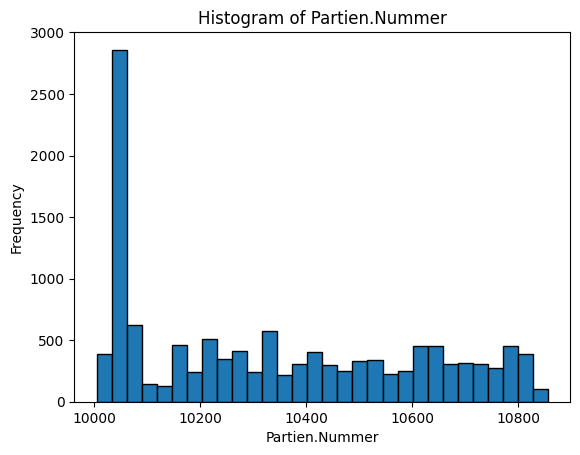

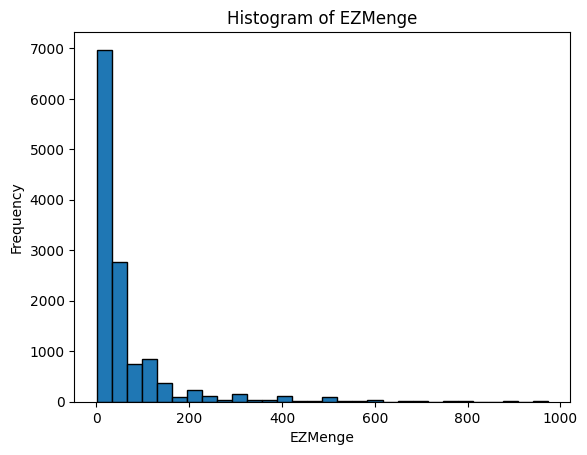

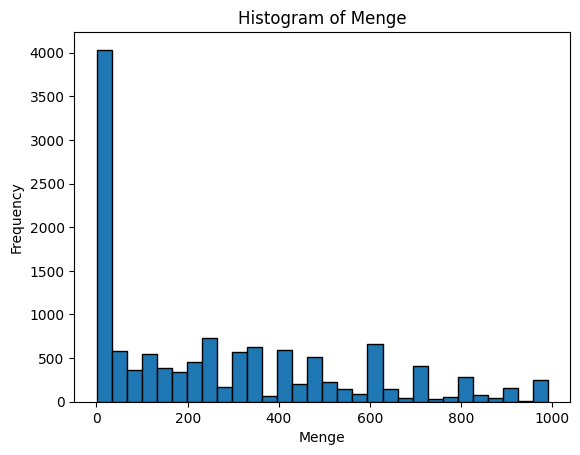

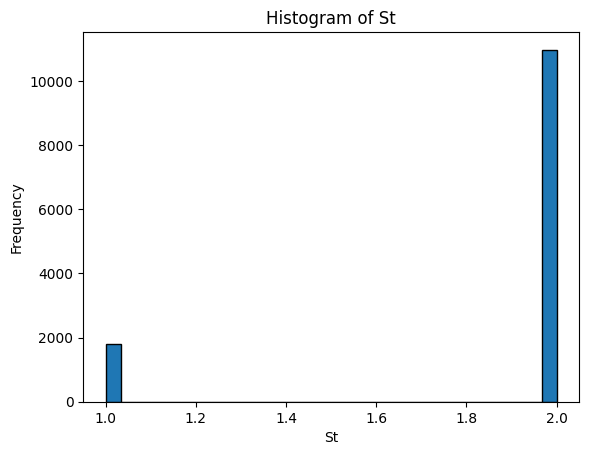

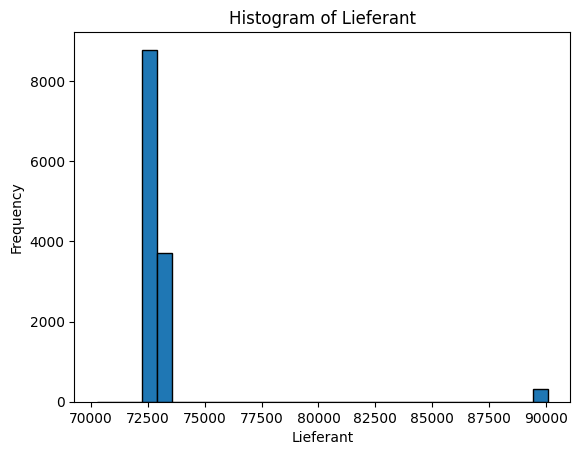

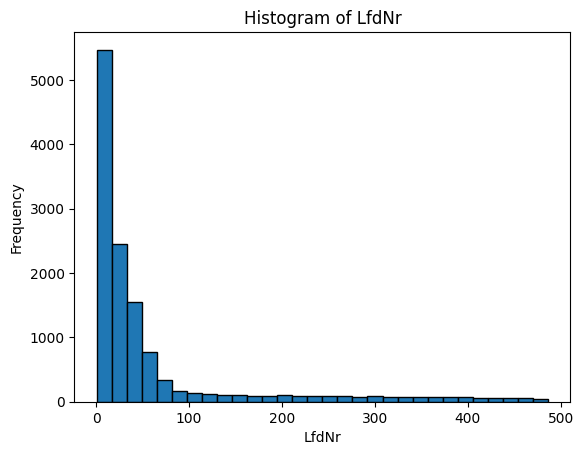

기본 통계량:
                    count unique                           top  freq  \
BDaAU               12800    NaN                           NaN   NaN   
BDaRG               12800    NaN                           NaN   NaN   
Artikel             12800   2447                       A-10005    37   
Bezeichnung         12799   2588                 Paprika Paste   136   
Partien.Nummer    12593.0    NaN                           NaN   NaN   
haltbar             12455   1610                    31.12.2030   278   
EZMenge           12794.0    NaN                           NaN   NaN   
Menge             12796.0    NaN                           NaN   NaN   
EK                  12138   1339                          0,89   104   
Preis               12658   1422                          0,89   102   
Gesamt              12754   4977                        936,00    42   
St                12792.0    NaN                           NaN   NaN   
ErstelltAm          12800    398                    21.1

In [64]:
# 1. 데이터의 기본 통계 확인
basic_stats = dataset_pur.describe(include='all').transpose()

# 2. 숫자형 열의 분포를 시각화 (히스토그램)
numeric_columns = dataset_pur.select_dtypes(include=['float64', 'int64']).columns
numeric_stats = dataset_pur[numeric_columns]

# 히스토그램 그리기
for col in numeric_columns:
    plt.figure()
    plt.hist(numeric_stats[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 기본 통계량 저장 또는 출력
print("기본 통계량:")
print(basic_stats)


In [63]:
#df_pur = dataset_pur[['BDaRG','Artikel','Bezeichnung', 'haltbar', 'EZMenge','Menge','EK','Lieferanten.Name','Lieferanten.Ort']].copy()
#df_pur
#df_pur.drop(df_pur[df_pur['haltbar'].isna()].index, inplace=True)
#df_pur
#df_pur.info()
#df_pur.head()
#df_pur.isnull().sum()